# Compresive Strength Concrete Problem

## Problem Statement

### Abstract
- Concrete is the most important material in civil engineering. The concrete compressive strength (concrete strength to bear the load) is a highly nonlinear function of age and ingredients.

|Sr No.|     Characteristics     |  Description |
|------|-------------------------|--------------|
|1     |Data Set Characteristics |Multivariate  |
|2     |Number of Instances      |1030          |
|3     |Area                     |Physical      |
|4     |Attribute Characteristics|Real          |
|5     |Number of Attributes     |9             |
|6     |Date Donated             |2007-08-03    |
|7     |Associated Tasks         |Regression    |
|8     |Missing Values           |N/A           |
|9     |Number of Web Hits       |231464        |

### Description:

| Features Name | Data Type | Measurement | Description |
| -- | -- | -- | -- |
|Cement (component 1) | quantitative | kg in a m3 mixture | Input Variable|
|Blast Furnace Slag (component 2) | quantitative | kg in a m3 mixture | Input Variable|
|Fly Ash (component 3) | quantitative | kg in a m3 mixture | Input Variable|
|Water (component 4) | quantitative | kg in a m3 mixture | Input Variable|
|Superplasticizer (component 5) | quantitative | kg in a m3 mixture | Input Variable|
|Coarse Aggregate (component 6) | quantitative | kg in a m3 mixture | Input Variable|
|Fine Aggregate (component 7) | quantitative | kg in a m3 mixture | Input Variable|
|Age | quantitative | Day (1~365) | Input Variable|
|Concrete compressive strength | quantitative | MPa | Output Variable|

### WORKFLOW :
- Load Data
- Check Missing Values ( If Exist ; Fill each record with mean of its feature )
- Standardized the Input Variables. **Hint**: Centeralized the data
- Split into 50% Training(Samples,Labels) , 30% Tes (Samples,Labels) and 20% Validation Data(Samples,Labels .
- Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).
- Compilation Step (Note : Its a Regression problem , select loss , metrics according to it)
- Train the Model with Epochs (100) and validate it
- If the model gets overfit tune your model by changing the units , No. of layers , activation function , epochs , add dropout layer or add Regularizer according to the need .
- Evaluation Step
- Prediction

### Load Data:
https://github.com/ramsha275/ML_Datasets/blob/main/compresive_strength_concrete.csv

## Solution

In [77]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow import keras 
from tensorflow.keras import layers
import numpy as np
from tensorflow.keras import regularizers

### Load Data

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# load data to a dataframe
data = pd.read_csv("/content/drive/MyDrive/DL_datasets/Concrete_Strength/compresive_strength_concrete.csv")
# check if data is correctly loaded
data.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


### Check Missing Values

- If Exist
  - Fill each record with mean of its feature 

In [5]:
# check info about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [6]:
# look at missing values
data.isnull().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

### Standardized the Input Variables

 - Hint
  - Centeralized the data

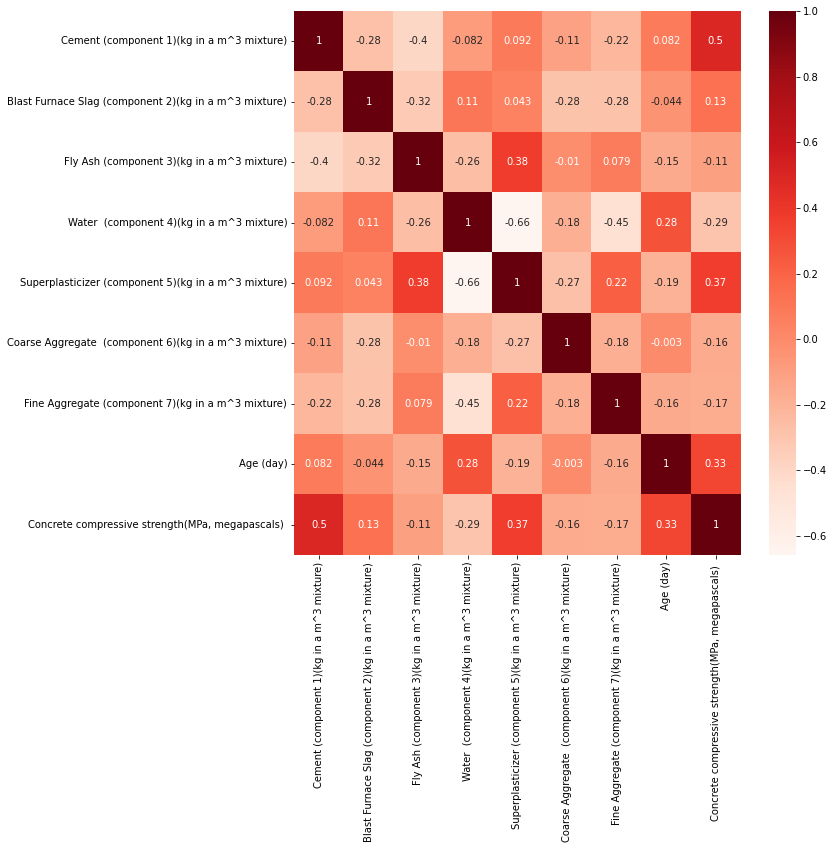

In [10]:
# before standardizing data lets have a look on co-relation
# find co-relation between data
plt.figure(figsize=(10,10))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [11]:
# we have data in int64 form.
# convert all the data to float64
data = data.astype("float64")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   float64
 8   Concrete compressive strength(MPa, megapascals)  

In [12]:
# now normalize data
  # centralize
data = data.sub(data.mean(axis=0), axis=1)
data.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,258.832136,-73.895825,-54.18835,-19.567282,-3.70466,67.081068,-97.580485,-17.662136,44.172039
1,258.832136,-73.895825,-54.18835,-19.567282,-3.70466,82.081068,-97.580485,-17.662136,26.072039
2,51.332136,68.604175,-54.18835,46.432718,-6.20466,-40.918932,-179.580485,224.337864,4.452039
3,51.332136,68.604175,-54.18835,46.432718,-6.20466,-40.918932,-179.580485,319.337864,5.232039
4,-82.567864,58.504175,-54.18835,10.432718,-6.20466,5.481068,51.919515,314.337864,8.482039


### Split into 50% Training(Samples,Labels) , 30% Tes (Samples,Labels) and 20% Validation Data(Samples,Labels .

In [16]:
# split data between features and labels
input_targets = data['Concrete compressive strength(MPa, megapascals) ']
input_data = data.loc[:, data.columns != 'Concrete compressive strength(MPa, megapascals) ']
input_targets.head()

0    44.172039
1    26.072039
2     4.452039
3     5.232039
4     8.482039
Name: Concrete compressive strength(MPa, megapascals) , dtype: float64

In [17]:
input_data.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day)
0,258.832136,-73.895825,-54.18835,-19.567282,-3.70466,67.081068,-97.580485,-17.662136
1,258.832136,-73.895825,-54.18835,-19.567282,-3.70466,82.081068,-97.580485,-17.662136
2,51.332136,68.604175,-54.18835,46.432718,-6.20466,-40.918932,-179.580485,224.337864
3,51.332136,68.604175,-54.18835,46.432718,-6.20466,-40.918932,-179.580485,319.337864
4,-82.567864,58.504175,-54.18835,10.432718,-6.20466,5.481068,51.919515,314.337864


In [19]:
# split data to train and test
# 30% test
# 70% train+validation
train_val_data, test_data, train_val_targets, test_targets = train_test_split(input_data, input_targets, test_size=0.3, random_state=1)

In [20]:
# look into data shape
print("Shape of test data : ",test_data.shape)
print("Shape of test targets : ",test_targets.shape)
print("Shape of train_val data : ",train_val_data.shape)
print("Shape of train_val targets : ",train_val_targets.shape)

Shape of test data :  (309, 8)
Shape of test targets :  (309,)
Shape of train_val data :  (721, 8)
Shape of train_val targets :  (721,)


In [22]:
# further split data to train and val
# 20% validation
# 50% train
train_data, val_data, train_targets, val_targets = train_test_split(train_val_data, train_val_targets, test_size=0.28, random_state=1)

In [23]:
# look into data shape
print("Shape of val data : ",val_data.shape)
print("Shape of val targets : ",val_targets.shape)
print("Shape of train data : ",train_data.shape)
print("Shape of train targets : ",train_targets.shape)

Shape of val data :  (202, 8)
Shape of val targets :  (202,)
Shape of train data :  (519, 8)
Shape of train targets :  (519,)


### Model

- input Layer (No. of features )
- 3 hidden layers including 10,8,6 unit
- Output Layer with activation function relu/tanh

In [55]:
# model defination
model = keras.Sequential([
    layers.Dense(10, activation="relu"),
    layers.Dense(8, activation="relu"),
    layers.Dense(6, activation="relu"),
    layers.Dense(1)
])

### Compilation Step

- Note
  - Its a Regression problem 
  - select loss
  - metrics according to it

In [56]:
# model compilation
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])

### Train the Model with Epochs (100) and validate it

In [57]:
# model training
history = model.fit(
        train_data, 
        train_targets,
        validation_data=(val_data, val_targets),
        epochs=100, 
        verbose=1)

Epoch 1/100
17/17 [==============================] - 1s 13ms/step - loss: 283.7529 - mae: 13.5404 - val_loss: 194.3978 - val_mae: 11.6415
Epoch 2/100
17/17 [==============================] - 0s 3ms/step - loss: 220.4869 - mae: 12.1906 - val_loss: 181.2731 - val_mae: 11.1050
Epoch 3/100
17/17 [==============================] - 0s 4ms/step - loss: 196.5152 - mae: 11.5014 - val_loss: 173.4357 - val_mae: 10.8426
Epoch 4/100
17/17 [==============================] - 0s 4ms/step - loss: 182.1254 - mae: 11.0749 - val_loss: 163.6296 - val_mae: 10.4873
Epoch 5/100
17/17 [==============================] - 0s 3ms/step - loss: 171.6622 - mae: 10.6672 - val_loss: 154.9253 - val_mae: 10.1251
Epoch 6/100
17/17 [==============================] - 0s 3ms/step - loss: 162.3014 - mae: 10.3485 - val_loss: 149.4236 - val_mae: 9.8381
Epoch 7/100
17/17 [==============================] - 0s 3ms/step - loss: 152.8819 - mae: 9.9698 - val_loss: 139.7963 - val_mae: 9.4364
Epoch 8/100
17/17 [========================

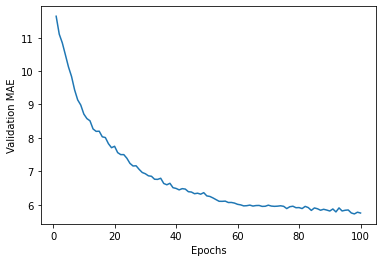

In [58]:
# plot mae to visulize results
plt.plot(range(1, len(history.history["val_mae"]) + 1), history.history["val_mae"])
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

- model did'nt overfit
- lets use Kfold validation

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


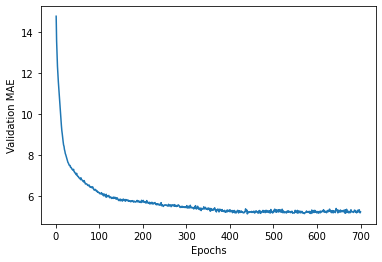

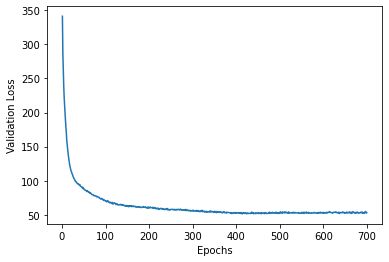

In [60]:
# K fold validation
def build_model():
  model = keras.Sequential([
    layers.Dense(10, activation="relu"),
    layers.Dense(8, activation="relu"),
    layers.Dense(6, activation="relu"),
    layers.Dense(1)
  ])
  model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
  return model

# Saving the validation logs at each fold

# number of folds
k = 4
# samples in each partion
num_val_samples = len(train_val_data) // k
# number of epochs
num_epochs = 700
# a list to store history on each fold
all_mae_histories = []
all_mae_loss_histories = []
# run for number of folds
for i in range(k):
    print(f"Processing fold #{i}")

    # select validation data during each fold
    val_data = train_val_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_val_targets[i * num_val_samples: (i + 1) * num_val_samples]

    # select validation data during each fold
    partial_train_data = np.concatenate(
        [train_val_data[:i * num_val_samples],
         train_val_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_val_targets[:i * num_val_samples],
         train_val_targets[(i + 1) * num_val_samples:]],
        axis=0)
    
    # build model based on defined function
    model = build_model()

    # model fitting
    history = model.fit(
        partial_train_data, 
        partial_train_targets,
        validation_data=(val_data, val_targets),
        epochs=num_epochs,  
        verbose=0)
    
    # get final score and append to list
    mae_history = history.history["val_mae"]
    mae_loss = history.history["val_loss"]
    all_mae_histories.append(mae_history)
    all_mae_loss_histories.append(mae_loss)

# Building the history of successive mean K-fold validation scores
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]
average_mae_loss = [np.mean([x[i] for x in all_mae_loss_histories]) for i in range(num_epochs)]

# Plotting validation scores
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

# Plotting validation scores
plt.plot(range(1, len(average_mae_loss) + 1), average_mae_loss)
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
plt.show()

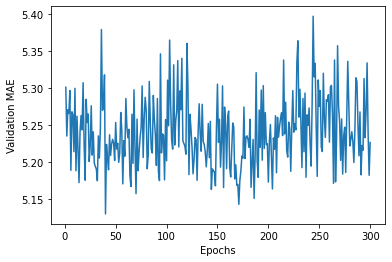

In [70]:
# Plotting validation scores, excluding the first 400 data points
truncated_mae_history = average_mae_history[400:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

- model overfits around 430 apoch

### Tune

- If the model gets overfit tune your model by changing
  - the units
  - No. of layers
  - activation function
  - epochs
  - add dropout layer or add Regularizer according to the need .

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


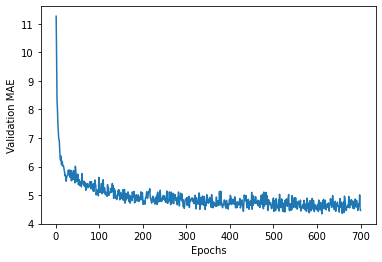

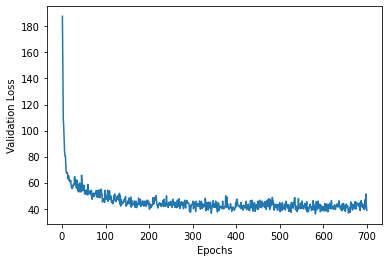

In [85]:
# Change
  # units / didn't work
  # layers / did't work
  # activation function / did't work
  # regulization / did't work
  # drop out / did't work
  # apoch
def build_model():
  model = keras.Sequential([
    layers.Dense(10, activation="relu"),
    layers.Dense(8, activation="relu"),
    layers.Dense(6, activation="relu"),
    layers.Dense(1)
  ])
  model.compile(optimizer=keras.optimizers.RMSprop(1e-2), loss="mse", metrics=["mae"])
  return model

# Saving the validation logs at each fold

# number of folds
k = 4
# samples in each partion
num_val_samples = len(train_val_data) // k
# number of epochs
num_epochs = 700
# a list to store history on each fold
all_mae_histories = []
all_mae_loss_histories = []
# run for number of folds
for i in range(k):
    print(f"Processing fold #{i}")

    # select validation data during each fold
    val_data = train_val_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_val_targets[i * num_val_samples: (i + 1) * num_val_samples]

    # select validation data during each fold
    partial_train_data = np.concatenate(
        [train_val_data[:i * num_val_samples],
         train_val_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_val_targets[:i * num_val_samples],
         train_val_targets[(i + 1) * num_val_samples:]],
        axis=0)
    
    # build model based on defined function
    model = build_model()

    # model fitting
    history = model.fit(
        partial_train_data, 
        partial_train_targets,
        validation_data=(val_data, val_targets),
        epochs=num_epochs,  
        verbose=0)
    
    # get final score and append to list
    mae_history = history.history["val_mae"]
    mae_loss = history.history["val_loss"]
    all_mae_histories.append(mae_history)
    all_mae_loss_histories.append(mae_loss)

# Building the history of successive mean K-fold validation scores
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]
average_mae_loss = [np.mean([x[i] for x in all_mae_loss_histories]) for i in range(num_epochs)]

# Plotting validation scores
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

# Plotting validation scores
plt.plot(range(1, len(average_mae_loss) + 1), average_mae_loss)
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
plt.show()

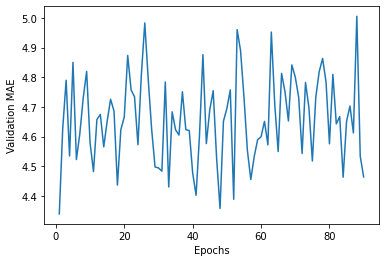

In [88]:
# Plotting validation scores, excluding the first 400 data points
truncated_mae_history = average_mae_history[610:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

- train final model

In [89]:
# final model
model = build_model()
model.fit(
    train_val_data, 
    train_val_targets,
    epochs=640)

Epoch 1/640
23/23 [==============================] - 1s 2ms/step - loss: 295.2794 - mae: 12.9866
Epoch 2/640
23/23 [==============================] - 0s 2ms/step - loss: 131.5960 - mae: 8.9268
Epoch 3/640
23/23 [==============================] - 0s 2ms/step - loss: 101.2589 - mae: 7.6787
Epoch 4/640
23/23 [==============================] - 0s 2ms/step - loss: 86.3142 - mae: 7.0571
Epoch 5/640
23/23 [==============================] - 0s 2ms/step - loss: 81.5699 - mae: 6.8829
Epoch 6/640
23/23 [==============================] - 0s 2ms/step - loss: 70.5659 - mae: 6.4379
Epoch 7/640
23/23 [==============================] - 0s 2ms/step - loss: 63.7718 - mae: 6.1138
Epoch 8/640
23/23 [==============================] - 0s 2ms/step - loss: 60.2470 - mae: 5.8272
Epoch 9/640
23/23 [==============================] - 0s 2ms/step - loss: 60.0516 - mae: 5.9444
Epoch 10/640
23/23 [==============================] - 0s 2ms/step - loss: 54.1531 - mae: 5.7182
Epoch 11/640
23/23 [=========================

### Evaluation Step

In [92]:
# Evaluating the model on the test set
# load model, saved before overfitting started
test_loss, test_mae = model.evaluate(test_data,test_targets) 
print(f"Test MAE: {test_mae:.3f}")

10/10 [==============================] - 0s 7ms/step - loss: 44.0896 - mae: 4.7731
Test MAE: 4.773


### Prediction

In [93]:
# test target
test_targets.values

array([-13.90796117, -15.88796117,   0.62203883, -23.85796117,
         4.02203883,  31.13203883, -14.63796117,  16.30203883,
         3.24203883, -13.99796117,   3.41203883, -20.78796117,
       -10.71796117,  -8.84796117, -25.47796117,  -8.95796117,
         2.59203883,  20.81203883,  31.88203883,   1.17203883,
       -10.82796117,  15.44203883, -18.37796117,  23.18203883,
        25.98203883,  10.43203883,   3.34203883,  -2.99796117,
        -2.01796117, -18.59796117,   7.88203883,  10.86203883,
       -13.18796117, -12.29796117,  -2.41796117,  -2.09796117,
       -15.39796117,  -8.96796117, -10.25796117, -15.08796117,
        -2.41796117, -20.82796117,   2.40203883,   2.81203883,
        -0.58796117,  -6.82796117,  -4.16796117,  -9.67796117,
        -7.21796117,  10.82203883, -12.97796117,  -0.05796117,
        26.10203883,  15.22203883,  20.88203883, -25.43796117,
         6.98203883, -14.75796117,  -2.62796117,   8.58203883,
        17.87203883,   7.88203883,  18.46203883,  20.24

In [94]:
# predection for first house in the test sample
predictions = model.predict(test_data)

In [95]:
predictions

array([[-17.794401  ],
       [-24.780087  ],
       [-15.662653  ],
       [-23.96787   ],
       [ -6.4262652 ],
       [ 25.003958  ],
       [-14.742191  ],
       [ 10.717508  ],
       [  0.87017727],
       [-16.974754  ],
       [ 15.093443  ],
       [-21.595535  ],
       [ -0.5123973 ],
       [ -5.4627624 ],
       [-28.873922  ],
       [ -5.5961366 ],
       [ 10.717508  ],
       [ 17.272404  ],
       [ 11.860407  ],
       [-10.145918  ],
       [-13.739965  ],
       [ 13.419716  ],
       [-20.48506   ],
       [ 19.72946   ],
       [ 25.68636   ],
       [  5.889623  ],
       [ -0.67245483],
       [ -4.9559245 ],
       [ -0.956316  ],
       [-21.79659   ],
       [ 10.717508  ],
       [ 21.606256  ],
       [ -9.177994  ],
       [ -9.447815  ],
       [ 17.363447  ],
       [  1.9178362 ],
       [-20.352182  ],
       [-12.71483   ],
       [-11.022785  ],
       [-20.052671  ],
       [  5.889623  ],
       [-22.675722  ],
       [ 12.430391  ],
       [  4

In [96]:
test_prediction_difference = test_targets.values - predictions
test_prediction_difference

array([[  3.88644   ,   1.90644   ,  18.41644   , ...,  29.37644   ,
         26.06644   ,  18.77644   ],
       [ 10.87212535,   8.89212535,  25.40212535, ...,  36.36212535,
         33.05212535,  25.76212535],
       [  1.7546918 ,  -0.2253082 ,  16.2846918 , ...,  27.2446918 ,
         23.9346918 ,  16.6446918 ],
       ...,
       [-17.51587752, -19.49587752,  -2.98587752, ...,   7.97412248,
          4.66412248,  -2.62587752],
       [-17.45043448, -19.43043448,  -2.92043448, ...,   8.03956552,
          4.72956552,  -2.56043448],
       [-17.57702807, -19.55702807,  -3.04702807, ...,   7.91297193,
          4.60297193,  -2.68702807]])

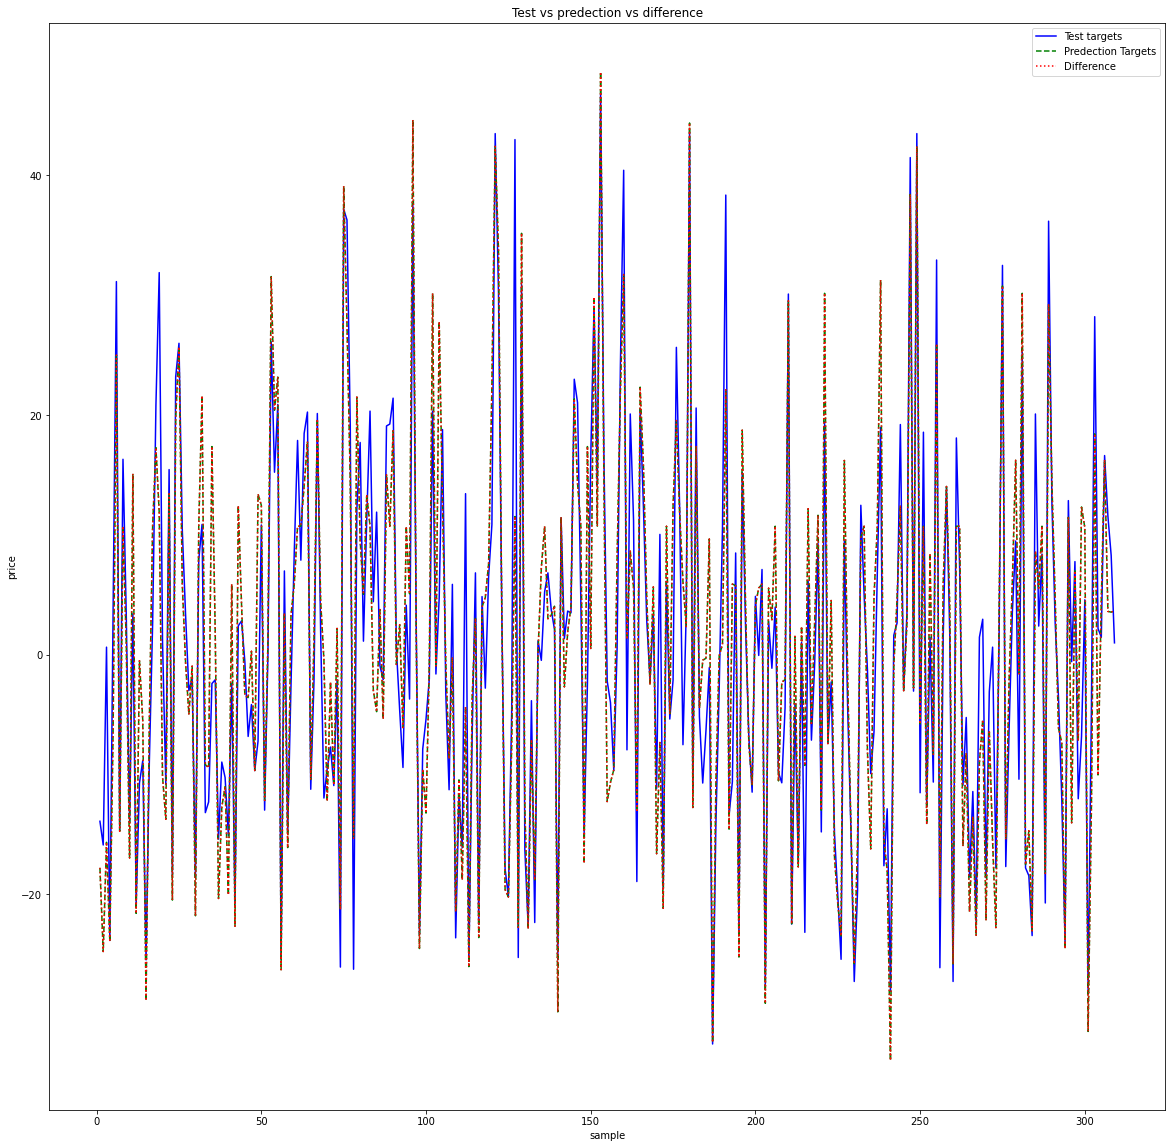

In [101]:
# plotting test results
sample = range(1, len(test_prediction_difference)+1)
plt.figure(figsize=(20,20))
plt.plot(sample, test_targets.values, "b-", label="Test targets",color='blue')
plt.plot(sample, predictions, "b--", label="Predection Targets",color='green')
plt.plot(sample, predictions, "b:", label="Difference",color='red')
plt.title("Test vs predection vs difference")
plt.xlabel("sample")
plt.ylabel("price")
plt.legend()

## The END